# COMP7703 Final Exam Jupyter Notebook

In [1]:
from mlp_model import *
from SupportCode.helpers import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set default figure size when plotting
plt.rcParams["figure.figsize"] = (12,8)
# Set default font size when plotting
plt.rcParams.update({'font.size': 15})

Instructions for updating:
non-resource variables are not supported in the long term


# Deep learning on Food Nutrients Dataset 

## Stage 1 - Exploratory Data Analysis (EDA)

### Setup data

In [2]:
dataset = pd.read_csv("FoodNutrients.csv")
# (N, D) = number of samples x number of features
dataset.shape

(1535, 252)

In [3]:
# Preview original dataset
dataset.head(len(dataset))

,Public Food Key,Classification,Food Name,"Energy, with dietary fibre","Energy, without dietary fibre",Moisture (water),Protein,Nitrogen,Total Fat,Ash,...,Proline,Unnamed: 243,Serine,Unnamed: 245,Threonine,Unnamed: 247,Tyrosine,Unnamed: 249,Valine,Unnamed: 251
0,NaN,NaN,NaN,kJ,kJ,g,g,g,g,g,...,mg/g N,mg,mg/g N,mg,mg/g N,mg,mg/g N,mg,mg/g N,mg
1,F009117,11101.0,"Tea, green, plain, without milk",7,7,95.7,0.2,0.04,0.1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F009125,11101.0,"Tea, regular, black, brewed from leaf or teaba...",2,2,99.8,0.1,0.02,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F009115,11103.0,"Tea, decaffeinated, black, brewed from leaf or...",6,6,99.8,0.1,0.02,0.1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F003017,11201.0,"Coffee, black, from instant coffee powder",5,4,99.2,0.2,0.03,0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,F004196,31502.0,"Gelatine, all types",1449,1449,11,84.4,15.2,0.4,1.8,...,821,12479,252,3830,137,2082,43,654,174,2645
1531,F005647,32102.0,"Milk, human/breast, mature, fluid",286,286,87.5,1.3,0.2,4.2,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,F003301,34101.0,"Crocodile, tail fillet, raw",442,442,76.2,22.5,3.6,1.6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,F003299,34101.0,"Crocodile, back leg, raw",455,455,76.1,22,3.52,2.2,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Set seed for partial reproducibility of results (everything numpy related)
np.random.seed(42)

# Identifying a unique feature to explore using machine learning techniques later on
target = dataset["Food Name"].values[1:]
# String splitting to only grab first word denoting the major food type (e.g. Milk, Juice, Beef, etc.)
target = [food.split(",")[0] for food in list(target)]

# First drop all columns (axis=1) with NaN values, then drop any remaining samples (axis=1) that have NaN values
dataset.dropna(axis=1, inplace=True)
dataset.dropna(axis=0, inplace=True)

# Remove first index (units for each feature e.g. kJ, g, etc.)
dataset.drop(index=0, inplace=True)

dataset["Food Name"] = target
# Focus only on samples that are classified as a meat - beef, lamb, pork or chicken
dataset = dataset[dataset["Food Name"].isin(["Beef", "Lamb", "Pork", "Chicken"])]

# Numeric elements appear as strings so force them into ints/floats
dataset = dataset.apply(pd.to_numeric, errors="ignore")

# Randomly shuffle entire dataset
dataset = dataset.iloc[np.random.permutation(len(dataset)), :].reset_index(drop=True)

# Preview reduced dataset
dataset.head(len(dataset))

,"Energy, with dietary fibre","Energy, without dietary fibre",Moisture (water),Protein,Nitrogen,Total Fat,Ash,Total dietary fibre,Alcohol,Total sugars,...,Unnamed: 193,Unnamed: 199,Unnamed: 203,Unnamed: 207,Unnamed: 209,Unnamed: 213,Caffeine,Cholesterol,Unnamed: 217,Food Name
0,738,738,66.9,22.8,3.66,9.5,1.2,0.0,0,0.0,...,13.82,17.27,2.68,0.35,33.779,448.27,0,58,185,Beef
1,472,470,72.6,19.4,3.10,1.2,3.0,0.2,0,0.2,...,1.18,2.36,1.77,0.21,5.316,7.09,0,82,222,Chicken
2,953,953,58.4,28.7,4.60,12.6,1.1,0.0,0,0.0,...,67.23,91.26,23.20,1.10,181.695,740.30,0,91,252,Lamb
3,573,573,71.1,21.7,3.47,5.5,1.2,0.0,0,0.0,...,18.88,29.65,3.49,0.34,52.017,242.49,0,60,176,Beef
4,528,528,72.7,21.9,3.50,4.2,1.1,0.0,0,0.0,...,18.97,36.05,9.77,0.48,64.787,167.82,0,78,192,Lamb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,602,602,71.6,20.4,3.26,6.9,1.0,0.0,0,0.0,...,32.32,61.42,16.65,0.82,110.386,285.93,0,60,179,Lamb
334,910,910,57.5,29.9,4.79,10.9,1.3,0.0,0,0.0,...,35.34,54.56,7.33,0.62,97.231,485.39,0,74,242,Beef
335,848,848,64.1,21.2,3.39,13.2,1.1,0.0,0,0.0,...,25.00,27.93,4.37,0.49,57.294,624.18,0,53,171,Beef
336,1961,1961,38.4,16.3,2.61,45.5,0.9,0.0,0,0.0,...,0.00,43.36,43.36,6.03,86.724,216.81,0,65,190,Pork


### Interpretation of the dataset: the Australian Food Composition Database (previously called NUTTAB) is a reference database that contains data on the nutrient content of Australian foods. It is referred to as a reference database because it contains mostly analysed data. Only a small proportion of data in the database come from other sources such as recipe calculations, food labels, imputing from similar foods or by borrowing from other countries. 

[Reference](https://www.foodstandards.gov.au/science/monitoringnutrients/afcd/Pages/default.aspx)

### Identify and convert features with categorical data into discrete numerical data (0/1/2/...)

In [5]:
# Assign 0 to beef, 1 to chicken, 2 to lamb and 3 to pork
dataset["Food Name"].unique()

array(['Beef', 'Chicken', 'Lamb', 'Pork'], dtype=object)

In [6]:
for column in dataset.columns:
    # If feature has datatype = object --> categorical feature
    if str(dataset[column].dtype) == "object":
        print(f"Converting categorical feature '{column}' into numerical feature...")
        
        # Number of unique categories in the feature
        unique_categories = dataset[column].unique()
        
        # Column that stores discretised data
        num_column = []
        
        # Replace category with discrete number (0/1/2/...) based on number of unique categories present
        for sample in dataset[column]:
            for i in range(dataset[column].nunique()):
                if sample == unique_categories[i]:
                    num_column.append(i)
                    
        dataset[column] = num_column
            
dataset.head(len(dataset))

Converting categorical feature 'Food Name' into numerical feature...


,"Energy, with dietary fibre","Energy, without dietary fibre",Moisture (water),Protein,Nitrogen,Total Fat,Ash,Total dietary fibre,Alcohol,Total sugars,...,Unnamed: 193,Unnamed: 199,Unnamed: 203,Unnamed: 207,Unnamed: 209,Unnamed: 213,Caffeine,Cholesterol,Unnamed: 217,Food Name
0,738,738,66.9,22.8,3.66,9.5,1.2,0.0,0,0.0,...,13.82,17.27,2.68,0.35,33.779,448.27,0,58,185,0
1,472,470,72.6,19.4,3.10,1.2,3.0,0.2,0,0.2,...,1.18,2.36,1.77,0.21,5.316,7.09,0,82,222,1
2,953,953,58.4,28.7,4.60,12.6,1.1,0.0,0,0.0,...,67.23,91.26,23.20,1.10,181.695,740.30,0,91,252,2
3,573,573,71.1,21.7,3.47,5.5,1.2,0.0,0,0.0,...,18.88,29.65,3.49,0.34,52.017,242.49,0,60,176,0
4,528,528,72.7,21.9,3.50,4.2,1.1,0.0,0,0.0,...,18.97,36.05,9.77,0.48,64.787,167.82,0,78,192,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,602,602,71.6,20.4,3.26,6.9,1.0,0.0,0,0.0,...,32.32,61.42,16.65,0.82,110.386,285.93,0,60,179,2
334,910,910,57.5,29.9,4.79,10.9,1.3,0.0,0,0.0,...,35.34,54.56,7.33,0.62,97.231,485.39,0,74,242,0
335,848,848,64.1,21.2,3.39,13.2,1.1,0.0,0,0.0,...,25.00,27.93,4.37,0.49,57.294,624.18,0,53,171,0
336,1961,1961,38.4,16.3,2.61,45.5,0.9,0.0,0,0.0,...,0.00,43.36,43.36,6.03,86.724,216.81,0,65,190,3


### Scatter matrix of dataset

In [7]:
# Do not uncomment, too many features present at this stage of the code
# fig = sns.pairplot(dataset, hue="Food Name")
# fig.fig.suptitle("Scatter matrix of dataset", y=1.02)

In [8]:
# Form inputs and target as numpy arrays
x_data = dataset[dataset.columns[:-1]].values
# Target is "sex" column
y_data = dataset[dataset.columns[-1]].values

In [9]:
# Perform one hot encoding to be able to train neural net
temp_y = []
for target in y_data:
    if target == 0:
        temp_y.append([1, 0, 0, 0])
    elif target == 1:
        temp_y.append([0, 1, 0, 0])
    elif target == 2:
        temp_y.append([0, 0, 1, 0])
    else:
        temp_y.append([0, 0, 0, 1])
y_data = np.array(temp_y)

## Stage 2 - Perform PCA to reduce dimensionality of the dataset

### Define function that implements PCA

In [10]:
def pca(x):
    """
    Function that implements Principal Component Analysis (PCA)
    Inputs:
        x = dataset to perform PCA on
    Outputs:
        z = linear projection of x using z = W^T * (x - m)
        W = principal components (eigenvectors of sample covariance matrix) ordered according to lambdas (see below)
        lambdas = eigenvalues of sample covariance matrix in descending order
    """
    
    # Calculating eigenvalues and eigenvectors
    # dim(W) = d x d, if choosing k columns --> d x k
    [lambdas, W] = np.linalg.eig(np.cov(x - np.mean(x), rowvar=False))
    
    # May be complex due to numerical errors
    lambdas = lambdas.real
    W = W.real
    
    # Sorting eigenvalues from largest to smallest
    idx = np.argsort(lambdas)[::-1]
    lambdas = np.sort(lambdas)[::-1]
    
    # Sorting eigenvectors (columns) according to index sequence from sorting eigenvalues
    W = W[:, idx]
    
    # z = W^T * (x - m)
    z = np.dot(W.T, (x - np.mean(x)).T).T;
    
    return [z, W, lambdas]

In [11]:
# Implement PCA - obtain linear projection of x (z), principal components (W) and eigenvalues (lambdas)
z, W, lambdas = pca(x_data)

# Proportion of variance explained by first two principal components
np.sum(lambdas[0:3])/np.sum(lambdas)

0.9948050753716449

### Scree graph and proportion of variance explained

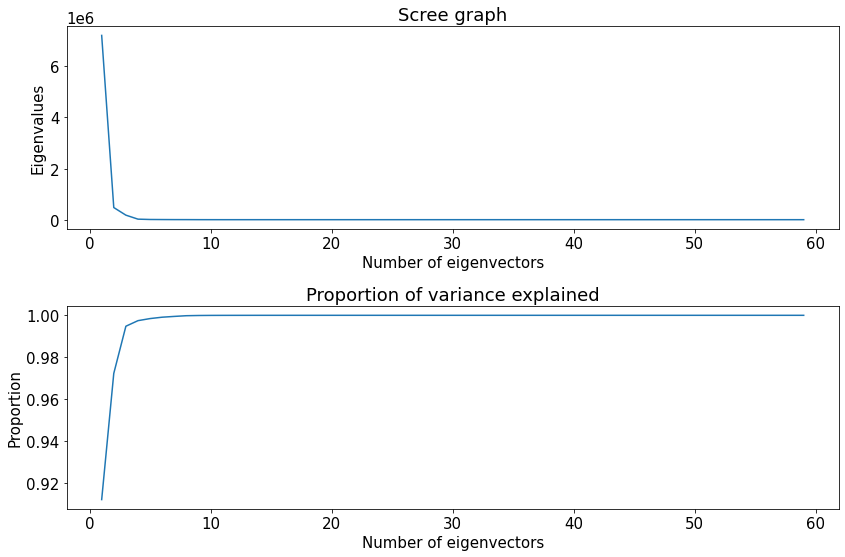

In [12]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(range(1, len(W) + 1), lambdas)
axs[0].set_xlabel("Number of eigenvectors")
axs[0].set_ylabel("Eigenvalues")
axs[0].set_title("Scree graph")


axs[1].plot(range(1, len(W) + 1), np.cumsum(lambdas)/np.sum(lambdas))
axs[1].set_xlabel("Number of eigenvectors")
axs[1].set_ylabel("Proportion")
axs[1].set_title("Proportion of variance explained")

fig.tight_layout()

### Scatter matrix of new dataset after PCA

In [13]:
# Keep first k principal components
k = 3

new_dataset = pd.DataFrame(np.concatenate((z[:, range(0, k)], dataset["Food Name"].values.reshape((len(z), 1))), axis=1))
new_dataset.columns = ["x" + str(i) for i in range(1, k + 1)] + ["Food Name"]
# new_dataset.drop(index=0, inplace=True)
new_dataset.head(len(new_dataset))

,x1,x2,x3,Food Name
0,-88.393047,-972.731432,198.292865,0.0
1,-76.944884,-406.144337,363.219672,1.0
2,-82.240439,-1387.184452,115.327520,2.0
3,-91.398701,-665.342333,239.275946,0.0
4,-82.407958,-571.613207,266.018529,2.0
...,...,...,...,...
333,-78.578234,-731.950874,225.141560,2.0
334,-91.506295,-1193.562697,297.573445,0.0
335,-86.234467,-1202.664378,137.121657,0.0
336,-78.251881,-2287.561544,1343.947093,3.0


Text(0.5, 1.02, 'Scatter matrix of new dataset after PCA')

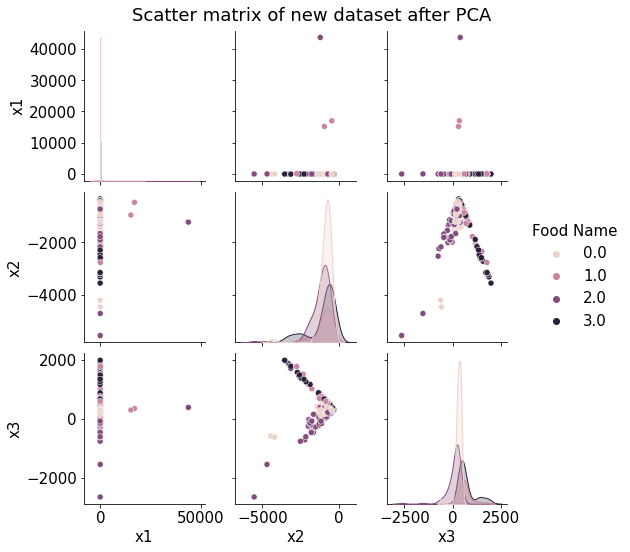

In [14]:
fig = sns.pairplot(new_dataset, hue="Food Name")
fig.fig.suptitle("Scatter matrix of new dataset after PCA", y=1.02)

## Stage 3 - Train 10 Neural Networks to get an ensemble of learners

In [15]:
# Form training and testing sets
train_set = new_dataset.iloc[:int(2/3*len(new_dataset))]
test_set = new_dataset.iloc[int(2/3*len(new_dataset)):]

x_test = test_set[test_set.columns[:-1]].values
y_test = test_set[test_set.columns[-1]].values

temp_y = []
# Perform one hot encoding to be able to train neural net
for target in y_test:
    if target == 0:
        temp_y.append([1, 0, 0, 0])
    elif target == 1:
        temp_y.append([0, 1, 0, 0])
    elif target == 2:
        temp_y.append([0, 0, 1, 0])
    else:
        temp_y.append([0, 0, 0, 1])
y_test = np.array(temp_y)

### Setup network hyperparameters

In [16]:
topology={}
# Use 2 hidden layers with 500 neurons in each layer
topology['hiddenDims'] = [500, 500]

# Training epochs
max_epochs = 500

### Setup optimiser dictionary

In [17]:
# Optimisation dictionary for Adam optimiser
optDicAdam = {}
optDicAdam["optMethod"] = "Adam"

### Train and test 9 neural networks

In [18]:
# Store validation and test set accuracies and predictions on test set for each model
valid_results = []
test_results = []
predictions = []

# Number of models to train
n = 9
for i in range(1, n + 1):
    print(f"Model {i}: ")
    
    optDicAdam["learning_rate"] = np.random.uniform(low=0.001, high=0.01)
    optDicAdam["beta1"] = np.random.uniform(low=0.85, high=0.95)
    optDicAdam["beta2"] = np.random.uniform(low=0.9, high=1.0)
    
    print(f"HYPERPARAMETERS: learning_rate={optDicAdam['learning_rate']}, beta1={optDicAdam['beta1']}, beta2={optDicAdam['beta2']}")
    
    if i in range(1, int(n/3) + 1):
        activationFunction = tf.nn.relu
    elif i in range(int(n/3) + 1, int(2/3*n) + 1):
        activationFunction = tf.nn.tanh
    else:
        activationFunction = tf.nn.sigmoid
    
    # Perform bootstrapping by resampling from new dataset (after PCA)
    rand_idxs = np.random.randint(0, len(train_set), len(train_set))
    bootstrap = train_set.iloc[rand_idxs, :].reset_index(drop=True)
    
    # Training set = bootstrapped dataset
    x_train = train_set[train_set.columns[:-1]].values
    y_train = train_set[train_set.columns[-1]].values
    
    temp_y = []
    # Perform one hot encoding to be able to train neural net
    for target in y_train:
        if target == 0:
            temp_y.append([1, 0, 0, 0])
        elif target == 1:
            temp_y.append([0, 1, 0, 0])
        elif target == 2:
            temp_y.append([0, 0, 1, 0])
        else:
            temp_y.append([0, 0, 0, 1])
    y_train = np.array(temp_y)
    
    # Validation set = everything in new dataset that is not in bootstrapped dataset (approx. 1/e = 37%)
    orig_idxs = []
    for idx in range(0, len(train_set)):
        if idx not in rand_idxs:
            orig_idxs.append(idx)
            
    x_valid = train_set.iloc[orig_idxs, :-1].values
    y_valid = np.array(train_set.iloc[orig_idxs, -1].values)
    
    temp_y = []
    # Perform one hot encoding to be able to test neural net
    for target in y_valid:
        if target == 0:
            temp_y.append([1, 0, 0, 0])
        elif target == 1:
            temp_y.append([0, 1, 0, 0])
        elif target == 2:
            temp_y.append([0, 0, 1, 0])
        else:
            temp_y.append([0, 0, 0, 1])
    y_valid = np.array(temp_y)

    data = [x_train, y_train, x_valid, y_valid, x_test, y_test]
    
    tf.keras.backend.clear_session()
    
    # Train model using bootstrapped dataset and test on samples from original dataset that did not appear in
    # bootstrapped dataset
    valid_accuracy, test_accuracy, prediction = MLPModel(data, dataset="Food Nutrients", topology=topology,
                                                         optimiser=optDicAdam, act=activationFunction, max_steps=max_epochs)
    
    valid_results.append(valid_accuracy)
    test_results.append(test_accuracy)
    predictions.append(prediction)

Model 1: 
HYPERPARAMETERS: learning_rate=0.00597537979217117, beta1=0.8796510143647798, beta2=0.9419780856446277
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Accuracy at step 0: 0.18518518
Accuracy at step 50: 0.69135803
Accuracy at step 100: 0.654321
Accuracy at step 150: 0.67901236
Accuracy at step 200: 0.7407407
Accuracy at step 250: 0.69135803
Accuracy at step 300: 0.7160494
Accuracy at step 350: 0.69135803
Accuracy at step 400: 0.7407407
Accuracy at step 450: 0.7777778
Accuracy on valid set: 0.7283950448036194


Model 2: 
HYPERPARAMETERS: learning_rate=0.00372271438890719, beta1=0.8740359816488634, beta2=0.9604534626084497
Accuracy at step 0: 0.24390244
Accuracy at step 50: 0.6097561
Accuracy at step 100: 0.5731707
Accuracy at step 150: 0.69512194
Accuracy at step 200: 0.68292683
Accuracy at step 250: 0.63414633
Accuracy at step 300: 0.6

### Descriptive statistics on validation and test sets

In [19]:
print(f"Validation set results")
print(f"Minimum: {min(valid_results)}")
print(f"Maximum: {max(valid_results)}")
print(f"Mean: {np.mean(valid_results)}")
print(f"Standard deviation: {np.std(valid_results)}")
print("\n")

print(f"Test set results")
print(f"Minimum: {min(test_results)}")
print(f"Maximum: {max(test_results)}")
print(f"Mean: {np.mean(test_results)}")
print(f"Standard deviation: {np.std(test_results)}")

Validation set results
Minimum: 0.6285714507102966
Maximum: 0.8717948794364929
Mean: 0.7180535197257996
Standard deviation: 0.07633665949106216


Test set results
Minimum: 0.5486725568771362
Maximum: 0.7876105904579163
Mean: 0.7118977308273315
Standard deviation: 0.07579584419727325


In [20]:
# Reshape into predictions along rows and models along columns
predictions = np.array(predictions).reshape(len(y_test), n)

# Generate ensemble test accuracy by calculating mean prediction and rounding it up/down (same as majority vote)
ensemble_test_accuracy = 0
for i in range(len(predictions)):
    # Calculate mean prediction and round it up/down
    prediction = np.round(np.mean(predictions[i, :]))
    if prediction >= 0.5:
        prediction = 1
    else:
        prediction = 0
    
    # Ensemble correctly predicted
    if prediction == test_set["Food Name"].iloc[i]:
        ensemble_test_accuracy += 1
        
ensemble_test_accuracy /= len(predictions)

### Plot validation and test set results

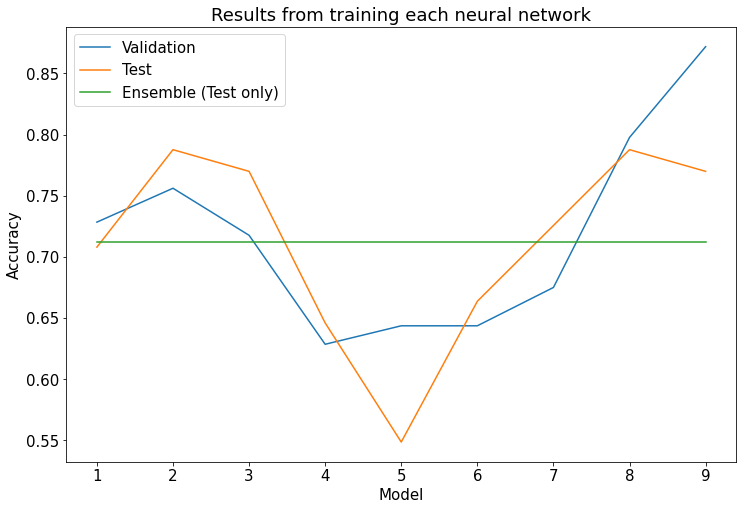

In [21]:
plt.plot(range(1, n + 1), valid_results, label="Validation")
plt.plot(range(1, n + 1), test_results, label="Test")
plt.plot(range(1, n + 1), [np.mean(test_results)]*n, label="Ensemble (Test only)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Results from training each neural network")
plt.legend()